# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, t
from itertools import product

### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [3]:
### YOUR CODE/SOLUTION HERE

### Соотношение устройств
p1 = 0.2
p2 = 0.3
p3 = 0.4

p_h_1 = 0.1
p_h_2 = 0.05
p_h_3 = 0.2

In [6]:
p_a = p1*p_h_1 + p2*p_h_2 + p3*p_h_3
round(p_a, 3)

0.115

### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [11]:
### YOUR SOLUTION HERE

# Все возможные исходы броска трёх монет
outcomes = list(product(['О', 'Р'], repeat=3))

# Определение событий A1, A2, A3
A1 = [outcome for outcome in outcomes if outcome[0] == outcome[1]]
A2 = [outcome for outcome in outcomes if outcome[1] == outcome[2]]
A3 = [outcome for outcome in outcomes if outcome[0] == outcome[2]]

# Вероятности событий A1, A2, A3
P_A1 = len(A1) / len(outcomes)
P_A2 = len(A2) / len(outcomes)
P_A3 = len(A3) / len(outcomes)

# Пересечения событий
A1_A2 = [outcome for outcome in outcomes if outcome in A1 and outcome in A2]
A1_A3 = [outcome for outcome in outcomes if outcome in A1 and outcome in A3]
A2_A3 = [outcome for outcome in outcomes if outcome in A2 and outcome in A3]
A1_A2_A3 = [outcome for outcome in outcomes if outcome in A1 and outcome in A2 and outcome in A3]

# Вероятности пересечений
P_A1_A2 = len(A1_A2) / len(outcomes)
P_A1_A3 = len(A1_A3) / len(outcomes)
P_A2_A3 = len(A2_A3) / len(outcomes)
P_A1_A2_A3 = len(A1_A2_A3) / len(outcomes)

# Проверка попарной независимости
pairwise_independent = (
    P_A1_A2 == P_A1 * P_A2 and
    P_A1_A3 == P_A1 * P_A3 and
    P_A2_A3 == P_A2 * P_A3
)

# Проверка независимости в совокупности
joint_independent = P_A1_A2_A3 == P_A1 * P_A2 * P_A3

print("Вероятности событий:")
print(f"P(A1) = {P_A1}")
print(f"P(A2) = {P_A2}")
print(f"P(A3) = {P_A3}")

print("\nВероятности пересечений:")
print(f"P(A1 ∩ A2) = {P_A1_A2}")
print(f"P(A1 ∩ A3) = {P_A1_A3}")
print(f"P(A2 ∩ A3) = {P_A2_A3}")
print(f"P(A1 ∩ A2 ∩ A3) = {P_A1_A2_A3}")

print("\nПроверка независимости:")
print(f"Попарно независимы: {pairwise_independent}")
print(f"Независимы в совокупности: {joint_independent}")

Вероятности событий:
P(A1) = 0.5
P(A2) = 0.5
P(A3) = 0.5

Вероятности пересечений:
P(A1 ∩ A2) = 0.25
P(A1 ∩ A3) = 0.25
P(A2 ∩ A3) = 0.25
P(A1 ∩ A2 ∩ A3) = 0.25

Проверка независимости:
Попарно независимы: True
Независимы в совокупности: False


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

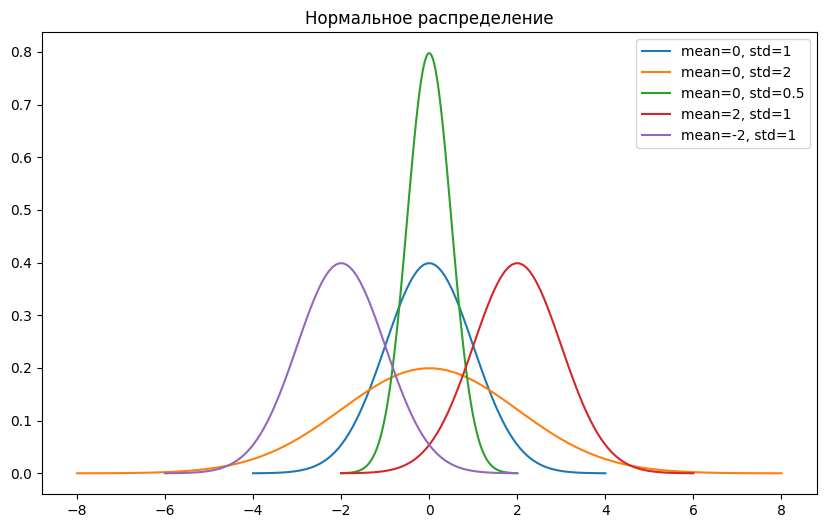

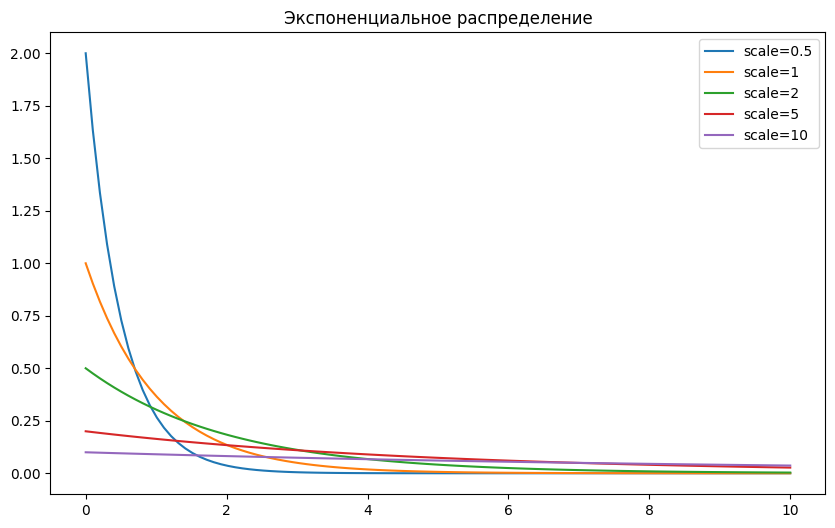

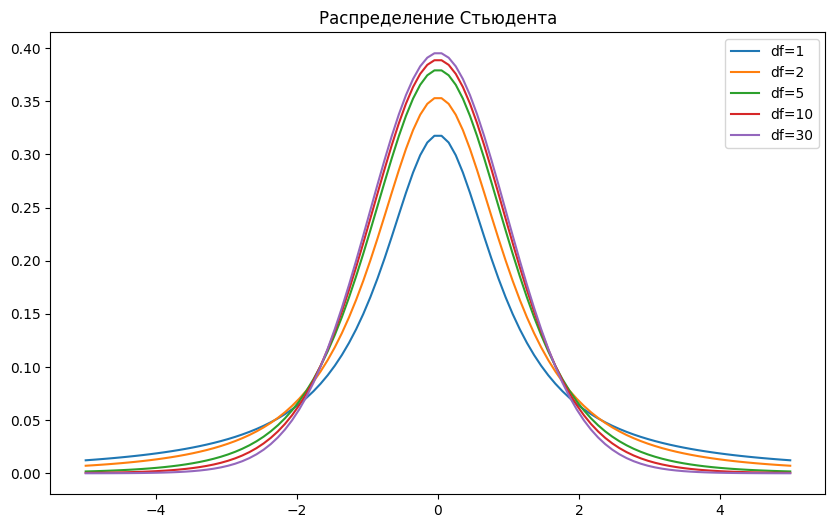

In [8]:
### YOUR CODE HERE
# Нормальное распределение
plt.figure(figsize=(10, 6))
for mean, std in [(0, 1), (0, 2), (0, 0.5), (2, 1), (-2, 1)]:
    x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
    plt.plot(x, norm.pdf(x, mean, std), label=f'mean={mean}, std={std}')
plt.title('Нормальное распределение')
plt.legend()
plt.show()

# Экспоненциальное распределение
plt.figure(figsize=(10, 6))
for scale in [0.5, 1, 2, 5, 10]:
    x = np.linspace(0, 10, 100)
    plt.plot(x, expon.pdf(x, scale=scale), label=f'scale={scale}')
plt.title('Экспоненциальное распределение')
plt.legend()
plt.show()

# Распределение Стьюдента
plt.figure(figsize=(10, 6))
for df in [1, 2, 5, 10, 30]:
    x = np.linspace(-5, 5, 100)
    plt.plot(x, t.pdf(x, df), label=f'df={df}')
plt.title('Распределение Стьюдента')
plt.legend()
plt.show()